In [ ]:
#import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import and check data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/insurance.csv'

In [ ]:
data = pd.read_csv(path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Analisa Descriptive Statistic**

Beberapa pertanyaan yang akan coba dijawab :
1. Rata-rata umur
2. Rata-rata nilai BMI perokok
3. Rata-rata umur pada data tersebut
4. Rata-rata nilai BMI yang merokok
5. Apakah variansi dari data perokok dan non-perokok sama?
6. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?
7. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non - perokok?
8. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok yang BMInya diatas 25 atau non perokok.
9. BMI mana yang lebih tinggi, seseorang laki laki atau perempuan?
10. BMI mana yang lebih tinggi, perokok atau non perokok?

In [ ]:
#rata-rata umur pengguna
avg_user_age = data['age'].mean()
avg_user_age.round(2)

39.21

In [ ]:
data['bmi'].mean().round(2)

30.66

In [ ]:
#rata-rata nilai BMI dari pengguna perokok
bmi_smoker = data[data['smoker']== 'yes']['bmi'].mean().round(2)
bmi_smoker

30.71

In [ ]:
#rata-rata umur perempuan dan laki-laki yang merokok
age_smoker = data[data['smoker'] == 'yes'].groupby('sex')['age'].agg([np.mean])
age_smoker.round(2)

,mean
sex,
female,38.61
male,38.45


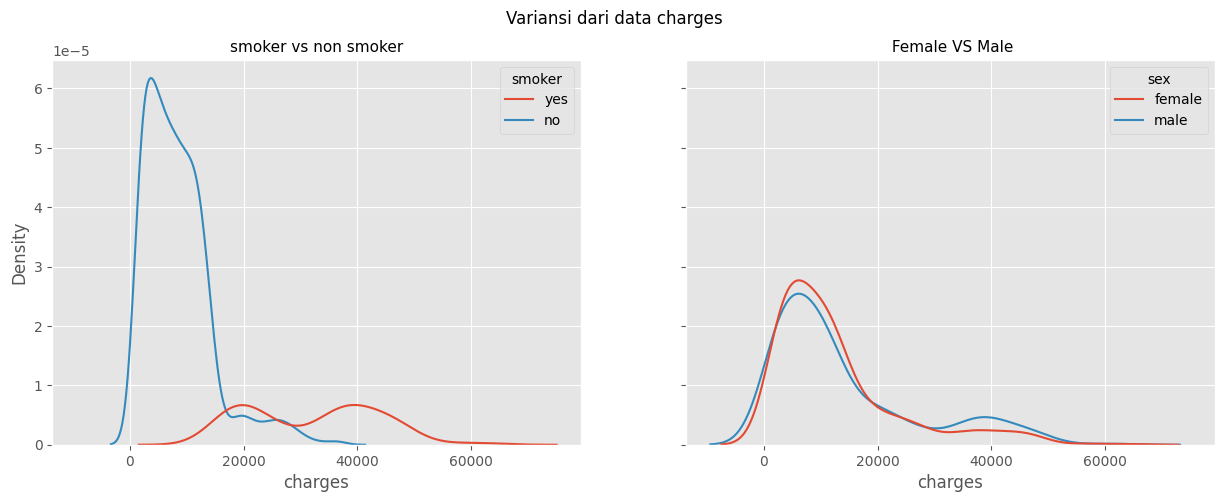

In [ ]:
#variansi data perokok dan non - perokok
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize = (15, 5), sharey = True, sharex = True)
fig.suptitle('Variansi dari data charges')

sns.kdeplot(data = data, x = "charges", color = "skyblue", ax = axes[0], hue = 'smoker')
axes[0].set_title('smoker vs non smoker' , size = 11)

sns.kdeplot(data = data, x = "charges", color = "purple", ax = axes[1], hue = 'sex')
axes[1].set_title(" Female VS Male" , size = 11)

plt.show()

In [ ]:
bmi_user = data.groupby(["smoker", "sex"])[['bmi','age','charges']].agg([np.mean])
bmi_user.round(2)

bmi    age   charges
                mean   mean      mean
smoker sex                           
no     female  30.54  39.69   8762.30
       male    30.77  39.06   8087.20
yes    female  29.61  38.61  30679.00
       male    31.50  38.45  33042.01

In [ ]:
#rata-rata tagihan kesehatan perokok yang BMInya diatas 25, atau non perokok yang BMInya diatas 25
bmi_over_25 = data[data['bmi'] > 25].groupby(["smoker"])[['charges']].agg([np.mean])
bmi_over_25.round(2)

,charges
,mean
smoker,
no,8629.59
yes,35116.91


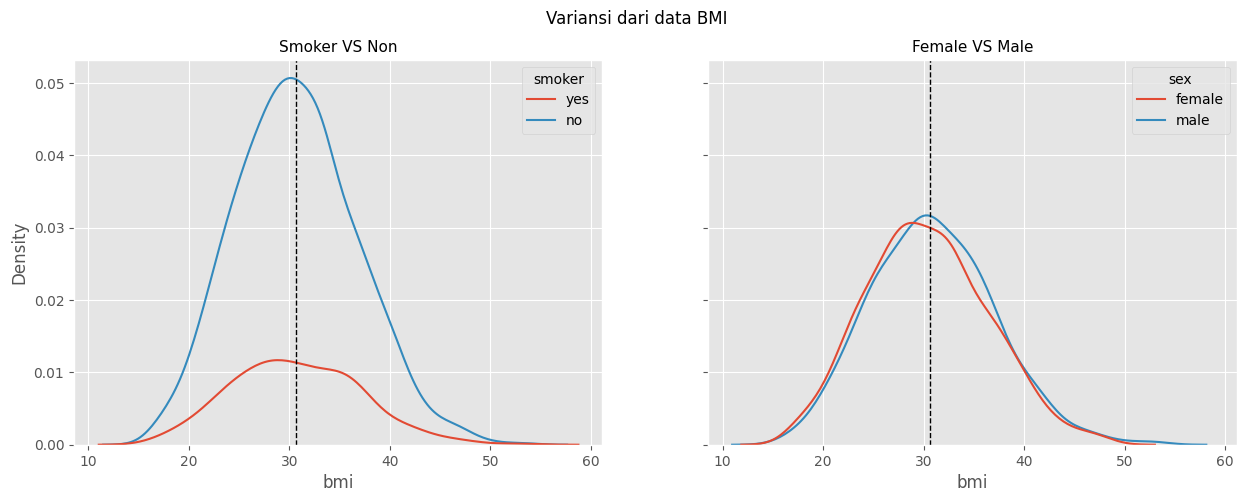

In [ ]:
#variansi data charges perokok dan non-perokok
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize = (15, 5), sharey = True, sharex = True)
fig.suptitle('Variansi dari data BMI')

sns.kdeplot(data = data, x = 'bmi', color = 'purple', ax = axes[0], hue = 'smoker')
axes[0].set_title("Smoker VS Non" , size = 11)
axes[0].axvline(data['bmi'].mean(), color = 'k' , linestyle = 'dashed', linewidth = 1)

sns.kdeplot(data = data, x = 'bmi', color = 'purple', ax = axes[1], hue = 'sex')
axes[1].set_title("Female VS Male" , size = 11)
axes[1].axvline(data['bmi'].mean(), color = 'k' , linestyle = 'dashed', linewidth = 1)

plt.show()

**Analisa Variabel Kategorik (PMF)**
Selanjutnya untuk memperdalam analisa, saya akan menjawab beberapa pertanyaan dibawah ini :
1. Gender yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi data banyak perokok atau non-perokok?
5. Berapa peluang seseorang perokok adalah perempuan?
6. Berapa peluang seorang perokok adalah laki laki?
7. Bagaimana distribusi tagihan dari tiap region?

In [ ]:
data.groupby(['sex', 'smoker']).count()['age']

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: age, dtype: int64

In [ ]:
#Gender dengan tagihan paling tinggi
data.groupby('sex')['charges'].mean().round(2)

sex
female    12569.58
male      13956.75
Name: charges, dtype: float64

In [ ]:
#Distribusi peluang tagihan di tiap-tiap region
data['prob_charges'] = data['charges'] / data['charges'].sum()
region_analysis = data.groupby('region').sum()
region_analysis.round(2)

<ipython-input-15-6d3627ef44f5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_analysis = data.groupby('region').sum()


,age,bmi,children,charges,prob_charges
region,,,,,
northeast,12723,9452.22,339,4343668.58,0.24
northwest,12739,9489.93,373,4035712.00,0.23
southeast,14174,12141.58,382,5363689.76,0.30
southwest,12823,9943.90,371,4012754.65,0.23


<Axes: xlabel='region'>

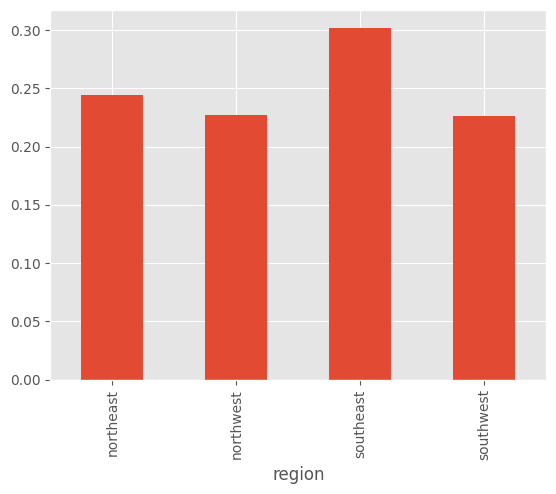

In [ ]:
region_analysis['prob_charges'].plot(kind='bar')

<Axes: xlabel='region'>

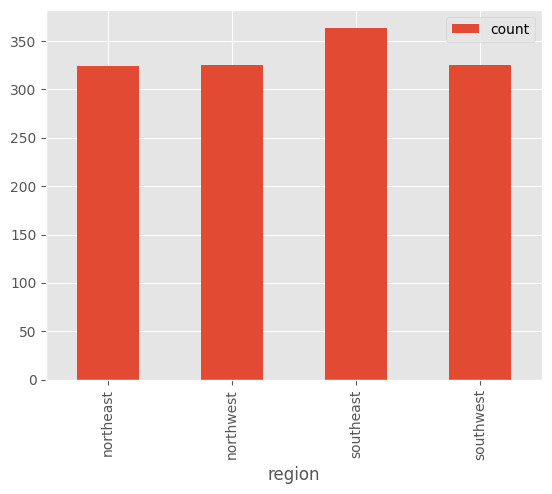

In [ ]:
#Apakah setiap region memiliki proporsi data dengan jumlah yang sama?
data.groupby(['region'])['charges'].agg(['count']).plot(kind='bar')

<Axes: xlabel='smoker'>

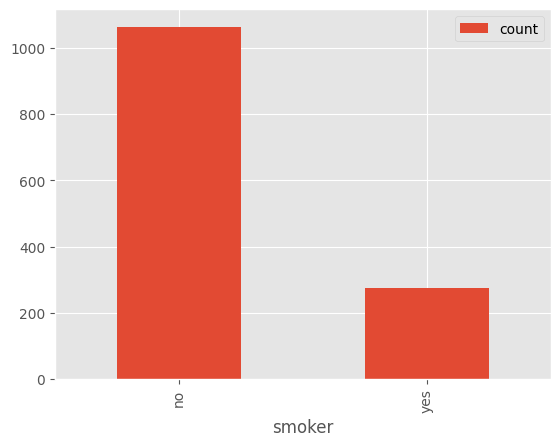

In [ ]:
#Perbandingan proprosi perokok dan non-perokok
data.groupby(['smoker'])['charges'].agg(['count']).plot(kind='bar')

Text(0.5, 1.0, 'Distribusi tagihan tiap region')

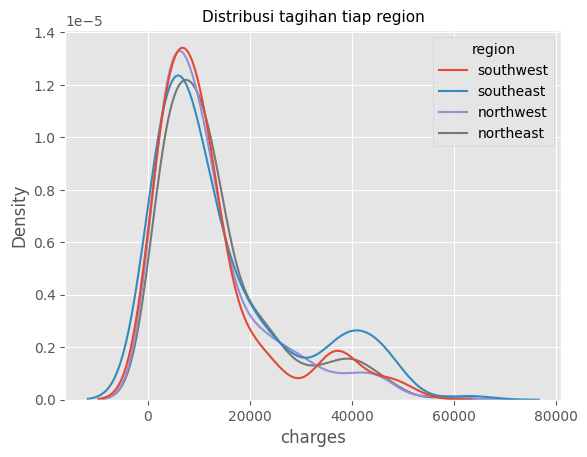

In [ ]:
sns.kdeplot(data=data, x = 'charges' , color = 'purple', hue = 'region').set_title('Distribusi tagihan tiap region' , size = 11)

<ipython-input-20-66a41078850a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  count_user_region = data.groupby(['region']).median()


<Axes: xlabel='region'>

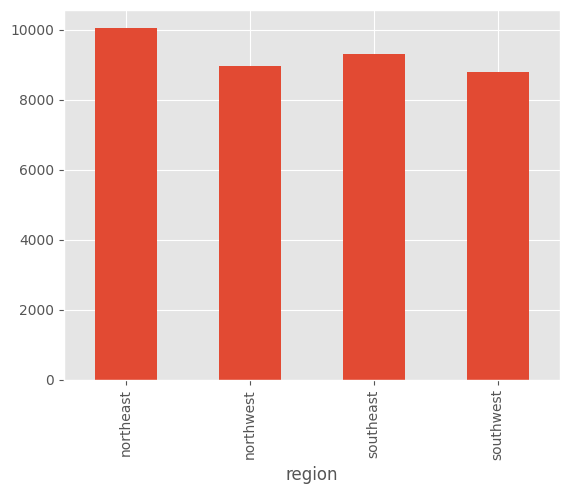

In [ ]:
#Proporsi data banyak orang setiap region
count_user_region = data.groupby(['region']).median()
count_user_region['charges'].plot(kind='bar')

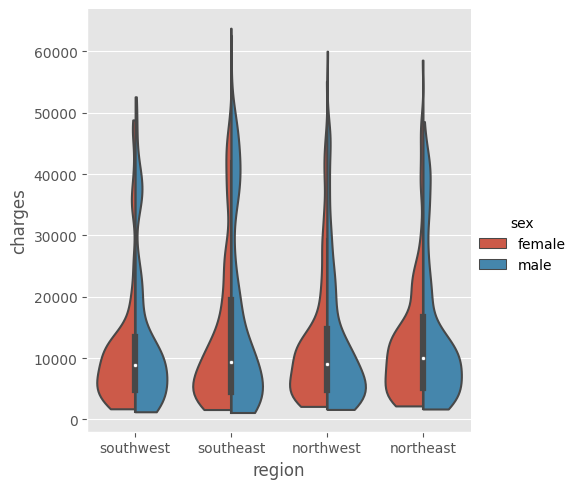

In [ ]:
sns.catplot(data = data, x = 'region' , y = 'charges' , hue = 'sex' , kind = 'violin' , bw = .25 , cut = 0, split = True,)

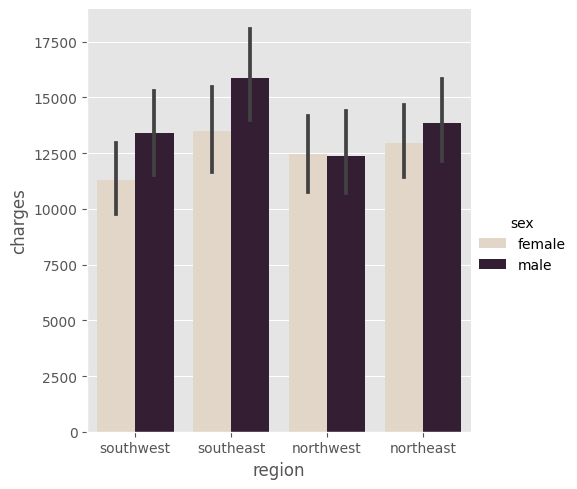

In [ ]:
#Variansi dari data charges perokok dan non perokok
sns.catplot(data = data, x = 'region', y = 'charges', kind = 'bar', palette = 'ch:.25' , hue = 'sex')
plt.show()

**Analisa Variabel Kontinu**
Variabel dalam data tidak semuanya bertipe kategorik, untuk memahami kemungkinan kondisi variabel bernilai kontinu terhadap tagihan kesehatan, maka kita akan menjawab pertanyaan sebagai berikut
1. Mencari peluang besar tagihan berdasarkan BMI
2. Mencari kemungkinan terjadi seorang perokok dengan BMI >25 akan mendapat tagihan 17k
3. Berapa peluang seseorang acak tagihan kesehatannya diatas 17k
4. Mana yang lebih mungkin terjadi ;
    a. Seseorang dengan BMI > 25 mendapat tagihan diatas 17k
    b. Seorang dengan BMI < 25 mendapat tagihan diatas 17k
5. Mana yang lebih mungkin terjadi ;
    a. Seseorang perokok dengan BMI > 25 mendapat tagihan diatas 17k
    b. Seorang non-perokok dengan BMI > 25 mendapat tagihan diatas 17k

In [ ]:
#Peluang besar tagihan berdasarkan BMI
data_smoker = data[data['smoker']== 'yes']
smoker_25up_bmi = data_smoker[data_smoker['bmi']> 25]
smoker_25up_bmi.round(2)

,age,sex,bmi,children,smoker,region,charges,prob_charges
0,19,female,27.90,0,yes,southwest,16884.92,0.0
11,62,female,26.29,0,yes,southeast,27808.73,0.0
14,27,male,42.13,0,yes,southeast,39611.76,0.0
19,30,male,35.30,0,yes,southwest,36837.47,0.0
23,34,female,31.92,1,yes,northeast,37701.88,0.0
...,...,...,...,...,...,...,...,...
1308,25,female,30.20,0,yes,southwest,33900.65,0.0
1313,19,female,34.70,2,yes,southwest,36397.58,0.0
1321,62,male,26.70,0,yes,northeast,28101.33,0.0
1323,42,female,40.37,2,yes,southeast,43896.38,0.0


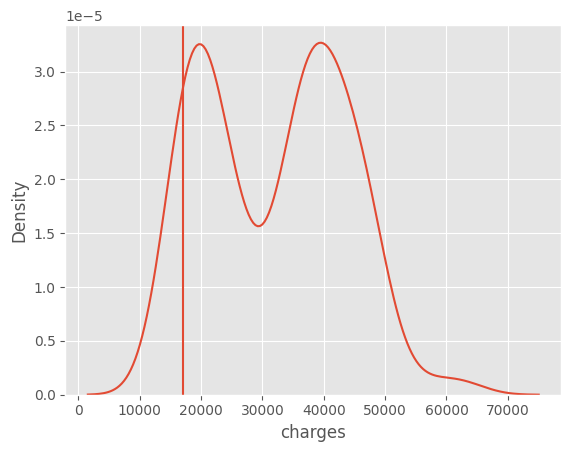

In [ ]:
#Peluang Mencari kemungkinan terjadi seorang perokok dengan BMI >25 akan mendapat tagihan 17k
sns.kdeplot(data=data_smoker, x = 'charges')
plt.axvline(x = 17000)

In [ ]:
#Peluang seseorang acak tagihan kesehatannya diatas 17k adalah perokok
(data_smoker[data_smoker['charges'] > 17000].count()['age']/ len(data_smoker) ).round(2)

0.92

In [ ]:
#Peluang perokok, bmi >25 dengan tagihan <17k
(smoker_25up_bmi[smoker_25up_bmi['charges'] < 17000].count()['age'] / len(smoker_25up_bmi)).round(2)

0.02

In [ ]:
#Peluang perokok, bmi >25 dengan tagihan  > 17k
(smoker_25up_bmi[smoker_25up_bmi['charges'] > 17000].count()['age'] / len(smoker_25up_bmi)).round(2)

0.98

In [ ]:
charges_up_17k = data[data['charges'] >= 17000]
charges_up_17k.round(2)

,age,sex,bmi,children,smoker,region,charges,prob_charges
3,33,male,22.70,0,no,northwest,21984.47,0.0
9,60,female,25.84,0,no,northwest,28923.14,0.0
11,62,female,26.29,0,yes,southeast,27808.73,0.0
14,27,male,42.13,0,yes,southeast,39611.76,0.0
19,30,male,35.30,0,yes,southwest,36837.47,0.0
...,...,...,...,...,...,...,...,...
1318,35,male,39.71,4,no,northeast,19496.72,0.0
1321,62,male,26.70,0,yes,northeast,28101.33,0.0
1323,42,female,40.37,2,yes,southeast,43896.38,0.0
1328,23,female,24.22,2,no,northeast,22395.74,0.0


In [ ]:
(charges_up_17k[charges_up_17k['bmi'] > 25].count()['age'] / len(charges_up_17k)).round(2)

0.85

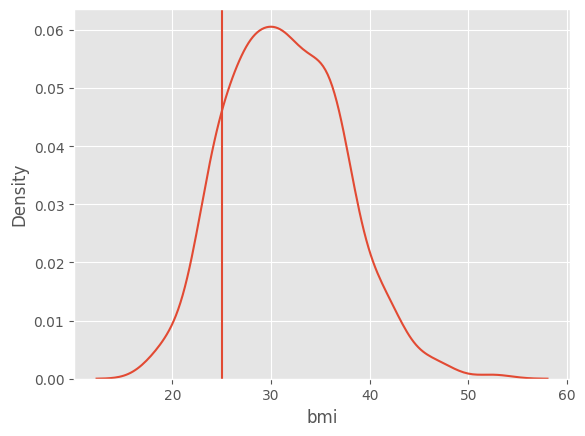

In [ ]:
sns.kdeplot(data=charges_up_17k, x = 'bmi')
plt.axvline(x=25)

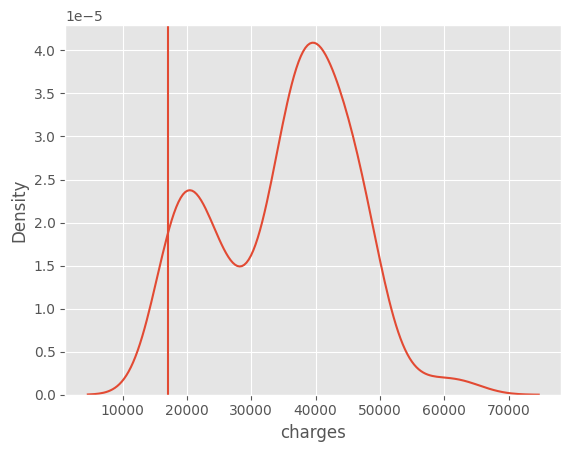

In [ ]:
sns.kdeplot(data = smoker_25up_bmi, x = 'charges')
plt.axvline(x =17000)

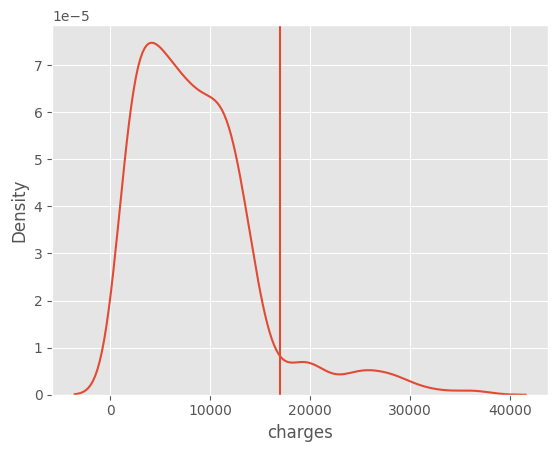

In [ ]:
non_smoker = data[data['smoker'] == 'no']
non_smoker_25up_bmi = non_smoker[non_smoker['bmi']>25]
sns.kdeplot(data=non_smoker_25up_bmi, x = 'charges')
plt.axvline(x=17000)

In [ ]:
(non_smoker_25up_bmi[non_smoker_25up_bmi['charges'] > 17000].count()['age'] / len(non_smoker_25up_bmi)).round(2)

0.08

In [ ]:
"""
mana yang lebih mungkin terjadi
1. Seseorang dengan BMI > 25 dengan tagihan > 17k atau
2. Seseorang dengan BMI < 25 dengan tagihan > 17k atau
"""
bmi_up25 = data[data['bmi'] >= 25]
(bmi_up25[bmi_up25['charges'] > 17000].count()['age'] / len(bmi_up25)).round(2)

0.26

In [ ]:
bmi_below25 = data[data['bmi'] < 25]
(bmi_below25[bmi_below25['charges'] > 17000].count()['age'] / len(bmi_below25)).round(3)

0.204

In [ ]:
#mana yang lebih mungkin terjadi
# 1. seseorang perokok dengan BMI > 25 mendaoatkan tagihan kesehatan diatas 16.7k atau
# 2. seseorang non perokok dengan BMI > 25 mendapatkan tagihan kesehatan diatas 16.7k

(smoker_25up_bmi[smoker_25up_bmi['charges'] > 17000].count()['age']/len(smoker_25up_bmi)).round(3)

0.977

In [ ]:
non_smoker_25up_bmi = non_smoker[non_smoker['bmi'] > 25]
(non_smoker_25up_bmi[non_smoker_25up_bmi['charges'] > 17000].count()['age'] / len(non_smoker_25up_bmi)).round(3)

0.077

**Analisa Korelasi Variabel**

Setelah menjawab kondisi-kondisi yang lebih mungkin memiliki tagihan kesehatan yang tinggi dari langkah-langkah sebelumnya. Kita juga daat mencari ketergantungan antara kondisi tersebut dengan tagihan kesehatan. Maka dari itu diperlukan analisa korelasi.


**SMOKER**

<ipython-input-38-6e9174f682a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data[data['smoker']== 'yes'].corr()


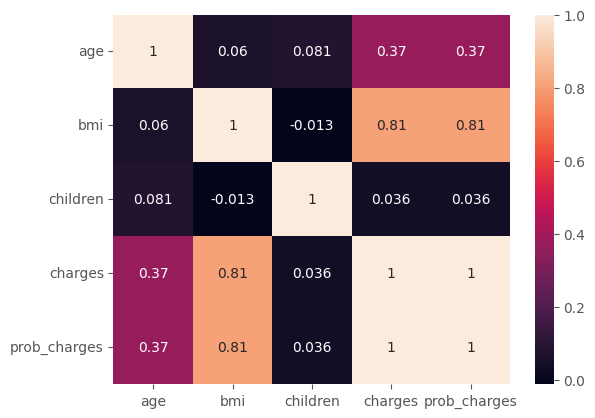

In [ ]:
corr_matrix = data[data['smoker']== 'yes'].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

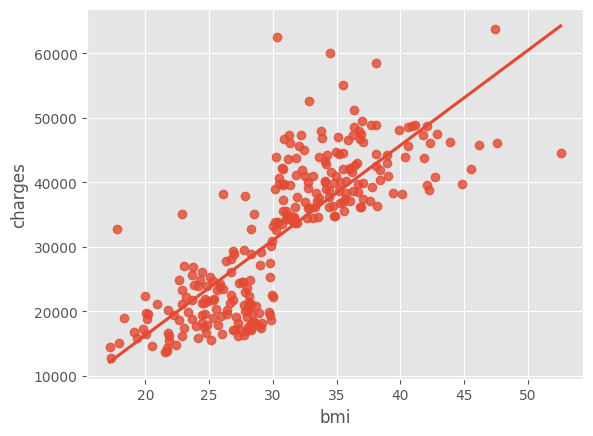

In [ ]:
sns.regplot(x = 'bmi',
            y = 'charges',
            ci = None,
            data = data[data['smoker']=='yes'])

**NON SMOKER**

<ipython-input-40-c96e3101acf5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data[data['smoker']== 'no'].corr()


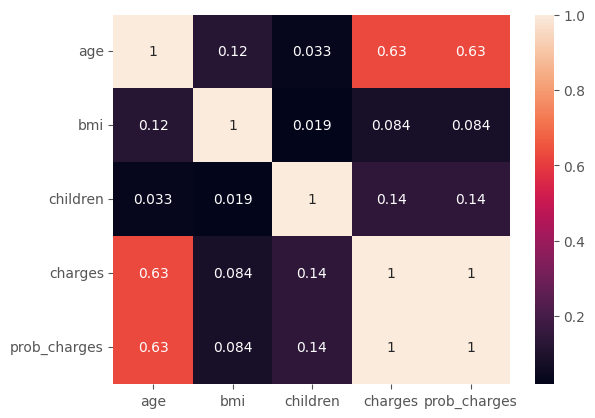

In [ ]:
corr_matrix = data[data['smoker']== 'no'].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<Axes: xlabel='age', ylabel='charges'>

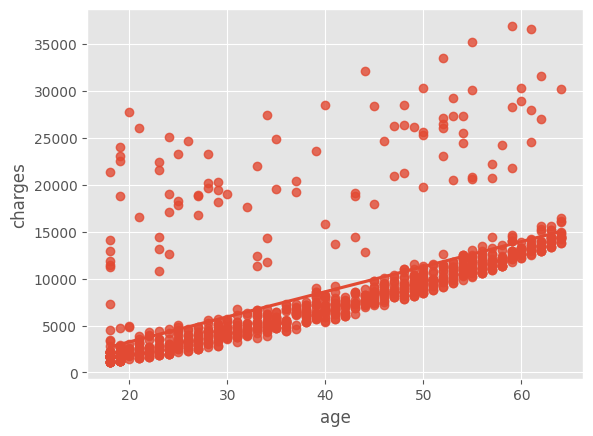

In [ ]:
sns.regplot(x = 'age',
            y = 'charges',
            ci = None,
            data = data[data['smoker']=='no'])

**Pengujian Hipotesis**
Langkah terakhir, kita cari apakah ada bukti statistik yang cukup terhadap klaim atau hipotesis tentang tagihan kesehatan. Anda wajib mengecek 3 hipotesis tentang karakter populasi dari data. Hipotesis yang wajib uji adalah


1.   Tagihan kesehatan perokok lebih tinggi daripada
     tagihan kesehatan non perokok
2.   Tagihan kesehatan dengan BMI diatas 25 lebih
     tinggi daripada tagihan kesehatan dengan BMI dibawah 25
3.   Tagihan kesehatan laki-laki lebih besar dari
     perempuan


Materi pertemuan : 15 & 16

Setelah melalui 5 langkah ini, Anda akan mendapatkan bahan untuk melakukan analisa mendalam serta dapat menjawab kondisi atau faktor dari pengguna asuransi kesehatan yang mempengaruhi besar tagihan.